<a href="https://colab.research.google.com/github/anamaria1-4/GitHub-Finanzas_-Computacionales/blob/main/Taller_1_Daniel_Jorge_%26_Ana_Mar%C3%ADa_Rojas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.uexternado.edu.co/wp-content/uploads/2020/07/logo-uec.png" width="180" height="80"> 

<center>

<br><br>

<b>Taller 1</b>
<div style="font-size:175%;color:write; background-color: #0064b0;">Pregrado en Finanzas y Relaciones Internacionales</div>
<div style="font-size:175%;color:white; background-color: #0064b0;">Finanzas Computacionales</div>
<div style="font-size:175%;color:white; background-color: #0064b0;">Profesor: Carlos Andrés Zapata Quimbayo</div>
<div style="font-size:250%;color:white; background-color: #0064b0;">Estudiantes: Daniel Steven Jorge Cardona y Ana María Rojas Giraldo</div>
<div style="font-size:175%;color:white; background-color: #0064b0;">2022</div> 
</center>


* Se importan las librerias necesarias.

In [1]:
import warnings 
import scipy.stats
import numpy as np
import pandas as pd 
import seaborn as sn
import seaborn as sns
from scipy import stats 
from scipy.stats import norm
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
from numpy.core.function_base import linspace

* Se importan yfinance para adquirir la información.

In [ ]:
!pip install yfinance
import yfinance as yf

# 1. A partir de Ticker se extrae toda la infomación de las compañias

In [69]:
MCD= yf.Ticker("MCD")
GE= yf.Ticker("GE")
IBM= yf.Ticker("IBM")
T= yf.Ticker("T")

* Se ajusta la escala de tiempo los activos de las compañias y se presenta el precio ajustado de las acciones.

In [70]:
activos = ["MCD", "GE","IBM","T"]
precios = yf.download(activos,start="2010-01-01",end="2022-01-01", interval="1Mo").dropna()
precios_adj = precios.loc[:,"Adj Close"]
precios_adj

[*********************100%***********************]  4 of 4 completed


,GE,IBM,MCD,T
Date,,,,
2010-01-01,91.124512,76.034492,43.710957,7.295420
2010-02-01,91.011154,78.997818,44.705189,7.279534
2010-03-01,103.782249,80.031326,47.111691,7.581749
2010-04-01,107.545715,80.499359,49.844326,7.646300
2010-05-01,93.232941,78.165504,47.217598,7.283845
...,...,...,...,...
2021-08-01,105.016113,126.196465,232.276596,19.121511
2021-09-01,102.644997,126.366852,237.139893,18.835596
2021-10-01,104.559372,113.787468,241.506790,17.615221


## a. Se calculan los retornos logarítmicos de las compañias. 

In [71]:
retornos=np.log(precios_adj/precios_adj.shift()).dropna() 
retornos

,GE,IBM,MCD,T
Date,,,,
2010-02-01,-0.001245,0.038233,0.022491,-0.002180
2010-03-01,0.131313,0.012998,0.052432,0.040677
2010-04-01,0.035621,0.005831,0.056383,0.008478
2010-05-01,-0.142815,-0.029421,-0.054138,-0.048563
2010-06-01,-0.125612,-0.009200,-0.006700,-0.004537
...,...,...,...,...
2021-08-01,0.017320,-0.004408,-0.021868,0.001370
2021-09-01,-0.022837,0.001349,0.020721,-0.015065
2021-10-01,0.018479,-0.104857,0.018247,-0.066985


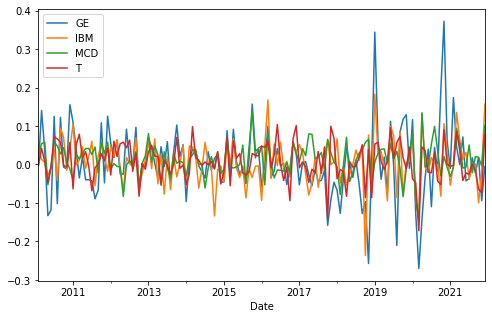

In [72]:
retornos_plot = precios_adj.pct_change().dropna()
retornos_plot.plot(figsize=(8,5));

Es importante acotar que, para calcular la rentabilidad de las acciones de las respectivas compañias, se utilizan los retornos continuos o logarítmicos y no los retornos discretos de los precios ajustados. Esto se debe a que, principalmente, para modelar el comportamiento de los precios de las acciones, comportamiento que cambia con frecuencia, es conveniente hacerlo de forma continua con el tiempo, para así poder determinar la volatilidad o el valor de libre riesgo que se asume. Lo anterior, permite determinar las acciones que pueden representar mayor rentabilidad con la tasa de riesgo más baja posible. A partir de la gráfica anteriormente expuesta, se pueden observar los clusters de volatilidad, es decir, existen periodos en los cuales la volatilidad de las acciones es alta en comparación con los demás periodos.

## b. Calcule las estadísticas descriptivas (media, mediana, desv. estándar, curtosis, simetría) para cada uno de ellos. Presente los estadísticos en una tabla para todos los activos. 

In [73]:
retornos_estadisticas={"GE":pd.Series([retornos["GE"].mean(),retornos["GE"].median(),np.std(retornos["GE"]),retornos["GE"].kurt(),retornos["GE"].skew()],index=["Media","Mediana","Desviación Estándar","Curtosis","Asimetría"]),"IBM":pd.Series([retornos["IBM"].mean(),retornos["IBM"].median(),np.std(retornos["IBM"]),retornos["IBM"].kurt(),retornos["IBM"].skew()],index=["Media","Mediana","Desviación Estándar","Curtosis","Asimetría"]),"MCD":pd.Series([retornos["MCD"].mean(),retornos["MCD"].median(),np.std(retornos["MCD"]),retornos["MCD"].kurt(),retornos["MCD"].skew()],index=["Media","Mediana","Desviación Estándar","Curtosis","Asimetría"]),"T":pd.Series([retornos["T"].mean(),retornos["T"].median(),np.std(retornos["T"]),retornos["T"].kurt(),retornos["T"].skew()],index=["Media","Mediana","Desviación Estándar","Curtosis","Asimetría"])}
df=pd.DataFrame(retornos_estadisticas)
df

,GE,IBM,MCD,T
Media,0.000231,0.003689,0.012605,0.006158
Mediana,-0.001930,0.002619,0.011742,0.006484
Desviación Estándar,0.086632,0.060324,0.042339,0.048129
Curtosis,3.040760,2.653584,1.596993,1.549810
Asimetría,-0.088296,-0.564633,-0.410194,-0.707909


In [74]:
x= pd.DataFrame()
Media = retornos.mean()
Mediana = retornos.median()
Verificación = Media>Mediana

x["Media"] = Media
x["Mediana"] = Mediana
x["Media>Mediana"] = Verificación
print(x)

        Media   Mediana  Media>Mediana
GE   0.000231 -0.001930           True
IBM  0.003689  0.002619           True
MCD  0.012605  0.011742           True
T    0.006158  0.006484          False


* **Curtosis:** esta medida de apuntamiento estudia las frecuencias alrededor de la media. Para la distribución normal estándar se menciona que la curtosis es exactamente igual a 0. No obstante, se puede observar que, las distribuciones de frecuencia de las acciones analizadas, no pertenencen a una distribución normal ya que su curtosis no es 0. Las distribución de frecuencia de estas acciones se encuentran clasificadas dentro de **Leptocúrtica**, es decir, los retornos de las acciones están mucho más concentradas alrededor del promedio y conforman una distribución mucho más apuntada que la normal.

* **Asimetría:** Existe una distribución de frecuencias simétricas cuando la mediana y la media siempre coinciden. No obstante, se observa que para estos activos no existe una distribución de simetría. Por lo tanto, para los activos **GE**, **IBM** y **MCD** se aprecia una distribución asimética a la derecha, ya que la media es mayor a la mediana, es decir hay valores más separados de la media a la derecha. No obstante, el activo **T** tiene una distribución diferente; su distribución es asimetríca a la izquierda, ya que la media es menor a la mediana, es decir hay valores más separados de la media a la izquierda.

* **Desviación Estándar:** Para analizar la variabilidad de las acciones con respecto a la media, la desviación estándar es una medida óptima. A partir de los datos obtenidos se puede observar que AT&T Inc y McDonald's cuentan con la dispersión de datos más baja; al encontrarse entre un rango de 0% - 5% se puede determinar una dispersión de datos mínima. Por otro lado, General Electric y International Business Machines tienen la dispesión de datos más alta entre los stocks; al encontrarse entre 5% y 15% se puede determinar que la dispersión del conjunto de datos es moderada. En caso de tener una desviación estándar mayor al 15% la dispersión de los datos sería alta, es decir, más volatil. 



## c. Presente en un Data Frame los retornos esperados y las volatilidades anualizadas 

#### Media y Sigma de **General Electric** anualizada.

In [75]:
meanGE,sigmaGE=retornos["GE"].mean(), retornos["GE"].std()
meanGE,sigmaGE
meanGE*12, sigmaGE*np.sqrt(12)

(0.0027767056621447253, 0.3011572647869667)

#### Retorno equivalente y conversión **General Electric** 

In [76]:
np.log(1+meanGE*12)

0.002772857736370148

#### Media y Sigma de **International Business Machines Corporation** anualizada.

In [77]:
meanIBM,sigmaIBM=retornos["IBM"].mean(), retornos["IBM"].std()
meanIBM,sigmaIBM
meanIBM*12, sigmaIBM*np.sqrt(12)

(0.04427081454100047, 0.20970330291747083)

#### Retorno equivalente y conversión **International Business Machines Corporation** 

In [78]:
np.log(1+meanIBM*12)

0.04331885672319173

#### Media y Sigma de **McDonald's Corporation** anualizada.

In [79]:
meanMCD,sigmaMCD=retornos["MCD"].mean(), retornos["MCD"].std()
meanMCD,sigmaMCD
meanMCD*12, sigmaMCD*np.sqrt(12)

(0.15126503444404424, 0.14718336445516558)

#### Retorno equivalente y conversión **McDonald's Corporation**

In [80]:
np.log(1+meanMCD*12)

0.14086136773689178

#### Media y Sigma de **AT&T Inc.** anualizada.

In [81]:
meanT,sigmaT=retornos["T"].mean(), retornos["T"].std()
meanT,sigmaT
meanT*12, sigmaT*np.sqrt(12)

(0.07389431866575537, 0.16731123778419732)

#### Retorno equivalente y conversión **AT&T Inc.**

In [82]:
np.log(1+meanT*12)

0.07129159149254426

* Se dividen los precios ajustados de cada activos.

In [115]:
precios_adjGE, precios_adjIBM, precios_adjMCD, precios_adjT= precios_adj.loc[:,"GE"], precios_adj.loc[:,"IBM"], precios_adj.loc[:,"MCD"], precios_adj.loc[:,"T"]

#### Volatilidad **General Electric**.

In [84]:
retornosGE = np.log(precios_adjGE/precios_adjGE.shift(1)).dropna()
sigma_dGE = retornosGE.std()
mean_dGE=retornosGE.mean()
mean_dGE
sigma_dGE*np.sqrt(12)

0.3011572647869667

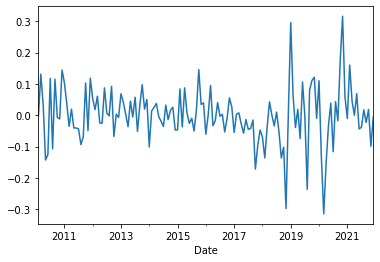

In [85]:
retornosGE.plot();

#### Volatilidad **International Business Machines Corporation**.

In [86]:
retornosIBM = np.log(precios_adjIBM/precios_adjIBM.shift(1)).dropna()
sigma_dIBM = retornosIBM.std()
mean_dIBM=retornosIBM.mean()
mean_dIBM
sigma_dIBM*np.sqrt(12)

0.20970330291747083

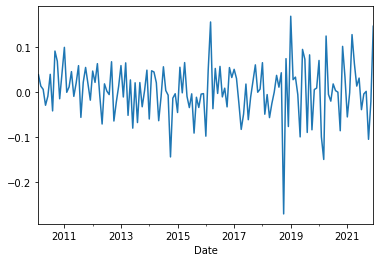

In [87]:
retornosIBM.plot();

#### Volatilidad **McDonald's Corporation**

In [88]:
retornosMCD = np.log(precios_adjMCD/precios_adjMCD.shift(1)).dropna()
sigma_dMCD = retornosMCD.std()
mean_dMCD=retornosMCD.mean()
mean_dMCD
sigma_dMCD*np.sqrt(12)

0.14718336445516558

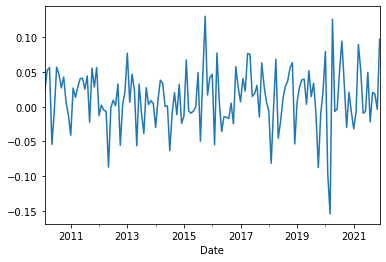

In [89]:
retornosMCD.plot();

#### Volatilidad **AT&T Inc.**

In [90]:
retornosT = np.log(precios_adjT/precios_adjT.shift(1)).dropna()
sigma_dT = retornosT.std()
mean_dT=retornosT.mean()
mean_dT
sigma_dT*np.sqrt(12)

0.16731123778419732

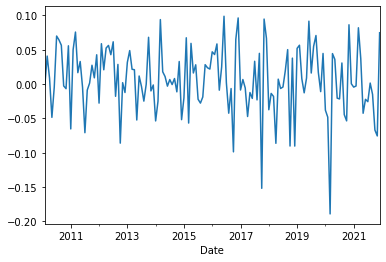

In [91]:
retornosT.plot();

* **DataFrame**

In [92]:
retornos_esperados_y_volatilidades={"GE":pd.Series([np.log(1+meanGE*12),sigma_dGE*np.sqrt(12)],index=["Retorno Esperado", "Volatilidades Anualizadas"]),"IBM":pd.Series([np.log(1+meanIBM*12),sigma_dIBM*np.sqrt(12)],index=["Retorno Esperado", "Volatilidades Anualizadas"]), "MCD":pd.Series([np.log(1+meanMCD*12),sigma_dMCD*np.sqrt(12)],index=["Retorno Esperado", "Volatilidades Anualizadas"]),"T":pd.Series([np.log(1+meanT*12),sigma_dT*np.sqrt(12)],index=["Retorno Esperado", "Volatilidades Anualizadas"])}
df1=pd.DataFrame(retornos_esperados_y_volatilidades)
df1

,GE,IBM,MCD,T
Retorno Esperado,0.002773,0.043319,0.140861,0.071292
Volatilidades Anualizadas,0.301157,0.209703,0.147183,0.167311


General Electric tiene el porcentaje de volatilidad más alto (30,11%) entre los demás activos analizados. No obstante, tiene el retorno esperado más bajo (0,27%). Por lo tanto, no es el activo más eficiente, ya que al realizar una inversión,  si se desea una rentabilidad mayor, se debe asumir un riesgo mayor, pero para este caso no es así, ya que al asumir un mayor riesgo se recibirá una rentabilidad menor. Por otro lado, se determina que los activos de la compañia McDonald's  tienen una rentabilidad esperada mayor con un menor riesgo entre los stocks, lo cual permite determinar que tiene mejor eficiencia entre los otros activos. Toda inversión conlleva un riesgo, por lo tanto, es importante conocer bien la relación riesgo/retorno para tomar la mejor desición al momento de invertir. 

## d. Calcule la matriz de correlaciones de Pearson y de Sperman 

#### Correlación de Pearson

In [93]:
retornos.corr()

,GE,IBM,MCD,T
GE,1.000000,0.363578,0.151317,0.346994
IBM,0.363578,1.000000,0.322564,0.412459
MCD,0.151317,0.322564,1.000000,0.338351
T,0.346994,0.412459,0.338351,1.000000


El coeficiente de correlación está ligado directamente con el grado de asociación lineal de los stocks, es decir, permite conocer si la relación entre las acciones es directa o inversamente proporcional. 

Los stocks de las compañias analizadas tienen una relación lineal positiva reducida o miníma entre ellas, ya que se encuentran entre 0 y 0.5. No obstante, existe una relación más fuerte entre **AT&T** y **International Business Machines** con una correlación de 0.412. Es importante acotar que, si la correlación entre los datos se encuentra entre 0.6 y 0.9 existe una relación moderada. Para obtener una correlación alta o fuerte es necesario obtentener una correlación entre 0.9 y 1. 

#### Correlación de Sperman

In [94]:
retornos.corr(method="spearman")

,GE,IBM,MCD,T
GE,1.000000,0.343396,0.091615,0.312855
IBM,0.343396,1.000000,0.260223,0.358745
MCD,0.091615,0.260223,1.000000,0.299497
T,0.312855,0.358745,0.299497,1.000000


El coeficiente de Spearman tiene la misma intensión del coeficiente de correlación de Pearson. No obstante, esta es una medida para los casos donde se tienen tanto variables discretas o continuas en una escala al menos de tipo ordinal, ya que el coeficiente de correlación de Pearson solo se define para variables cuantitativas continuas. Es un método no paramétrico muy utilizado cuando no se satisface la condición de normalidad necesaria para aplicar la correlación de Pearson. El coeficiente de correlación por rangos de Spearman varía de -1.0 a
+1.0 y se interpreta igual que el coeficiente de correlación de Pearson, en que el valor positivo
cercano a 1.0 indica una fuerte relación: si un rango crece el otro crece. Las corrrelaciones cercanas a -1.0 indican una fuerte relación pero negativa entre los rangos: cuando un rango crece el otro disminuye. Por  lo tanto, se puede determniar que la relación más débil existente entre los activos se encuentra entre **General Electric** y **McDonald's** con una correlación de 0.0916. Aunque en general las correlaciones son débiles, los stocks con mayor correlación se encuentra entre **International Business Machines** y **AT&T**, al igual que en la correlación de Pearson. Es importante acotar que las correlaciones de Spearman son menores a las correlaciones de Pearson. 

## e. Grafique el histograma de frecuencia de los retornos para dos de las cuatro acciones. 

* Sturge's Rulef: Se calcula el número óptimo de contenedores para el historgrama.

In [95]:
np.log(143)*3.32+1

17.47664417246289

* Se calculan las frecuencias de los retornos logarítmicos.

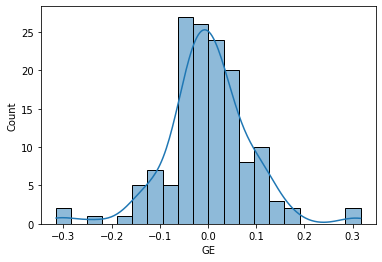

In [96]:
sns.histplot(retornos["GE"],kde=True);

* Se normalizan las frecuencias

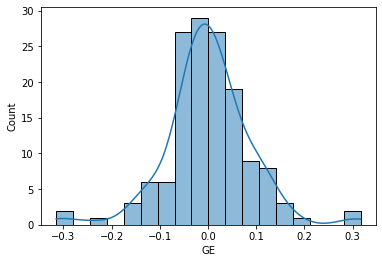

In [97]:
ret= np.log(precios_adj/precios_adj.shift()).dropna()
sns.histplot(data=ret, x="GE", kde=True, bins=18);

A partir de la gráfica se puede observar que tan bien se encuentran ajustados los datos. Es importante normalizar los datos para lograr una aproximaxión de la distribución normal. No obstante, al trabajar con periodicidad diaria el exceso de curtosis aumenta, por lo tanto, se puede corregir cambiando la periodicidad a mensual como se esta trabajando. Si los datos se encuentran alineados indica que entre la distribución teórica y acumulada los supuestos se cumplen muy bien. Después de normalizar la gráfica se puede afirmar que existe un problema de curtosis a la derecha, por lo tanto, invalidará el supuesto de normalidad. Dentro del análisis de stocks siempre habrá un exceso de curtosis, pero la media y la desviación estándar son suficientes para solucionar este problema.

* Se calculan los retornos logarítmicos.

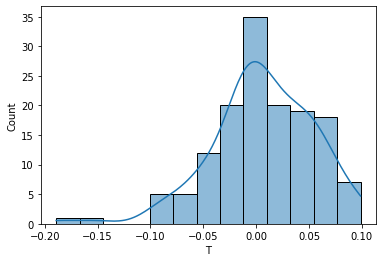

In [98]:
sns.histplot(retornos["T"],kde=True);

* Se normalizan las frecuencias

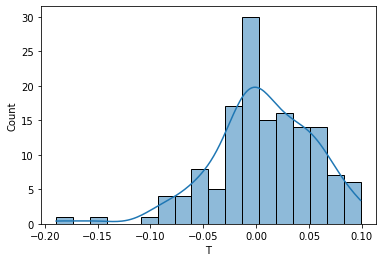

In [99]:
ret= np.log(precios_adj/precios_adj.shift()).dropna()
sns.histplot(data=ret, x="T", kde=True, bins=18);

Después de normalizar la gráfica se puede afirmar que existe un problema curtosis a la izquierda, como se menciono en el punto b, por lo tanto, invalidará el supuesto de normalidad. No obstante, existe una gran concentración de datos con respecto a su media, es decir, los datos se acercaron a 0.0061.

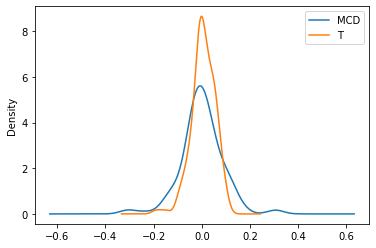

In [100]:
ret['GE'].plot(kind='kde',label="MCD")
ret['T'].plot(kind='kde',label="T")
plt.legend();

**McDonald's** tiene una distribución empirica más normal que **AT&T**. Además, AT&T tiene mayor volatilidad, ya que la distancia es mayor. 

## f. Implemente las pruebas de normalidad de Kolmogorov-Smirnov para todos los activos. Consolide los resultados en un Data Frame para todos.


In [101]:
KS={"GE":stats.kstest(retornos["GE"],"norm"),"IBM":stats.kstest(retornos["IBM"],"norm"),"MCD":stats.kstest(retornos["MCD"],"norm"), "T":stats.kstest(retornos["T"],"norm")}
KS_PN=pd.DataFrame(KS, index=["Statistic","P-Value"])
KS_PN

,GE,IBM,MCD,T
Statistic,4.159826e-01,4.372657e-01,4.543298e-01,4.606995e-01
P-Value,6.374905e-23,2.144155e-25,1.736383e-27,2.713426e-28


Se toma  como nivel de significancia α = 0.05.
Se puede observar que los valores p de los stock se encuentran muy cercanos a 0. Un valor-p es una probabilidad que se usa para determinar si se rechaza o no la hipótesis nula. Por lo tanto, se rechaza la hipotesis nula ya que el valor-p es menor que al nivel de significancia del 5% tomado para el análisis. Por lo cual la distribución de frecuencias observada no es consistente con la distribución teórica, es decir no sigue una distribución normal.

# 2. Con la misma información del punto 1:

## a. Calcule la volatilidad mensual y anualizada de las series de retornos usando las medidas de:
####  i) desviación estándar
#### ii) Parkinson
#### iii) Garman-Klass
#### iv) Volatilidad ponderada exponencial (EWMA) con una lambda de 0.94. 

#### Presente los resultados en un Data Frame


#### **i). Desviación estándar**

In [102]:
retornos_m=np.log(precios_adj/precios_adj.shift(1)).dropna()
sdm = retornos_m.std()
sda = sdm*np.sqrt(12)
sda

GE     0.301157
IBM    0.209703
MCD    0.147183
T      0.167311
dtype: float64

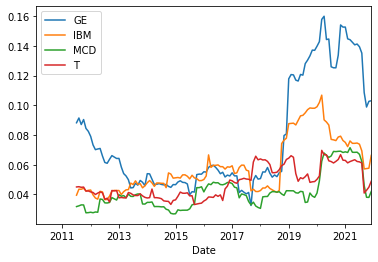

In [103]:
roll_std = (retornos.rolling(window=18).std())
roll_std.plot();

#### **ii). Medida de Parkinson**

In [104]:
lnHL = np.log(precios["High"]/precios["Low"]).dropna()
sigmaPark_d = (((1/(4*np.log(2)))*lnHL**2)-(retornos.mean()**2)).mean()**0.5
pdm = sigmaPark_d
pda = sigmaPark_d*np.sqrt(12)


#### **iii). Medida de Garman-Klass**

In [105]:
lnHL = np.log(precios["High"]/precios["Low"]).dropna() 
lnCO = np.log(precios["Close"]/precios["Open"]).dropna() 
sigmaGK_d = ((0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)-(retornos.mean()**2)).mean()**0.5
gkdm = sigmaGK_d
gkda = sigmaGK_d*np.sqrt(12)


#### **iv). Volatilidad ponderada exponencial (EWMA)**

In [106]:
def EWMAvol(retornos,Lambda):
  m = len(retornos) 
  b = np.arange(m-1,-1,-1) 
  l = np.repeat(Lambda,m)

  varewma = ((np.power(retornos,2)*(np.power(l,b))).sum())*(1-Lambda) 
  EWMAvol = np.sqrt(varewma)
  return(EWMAvol) 
Lambda = 0.94
sigmaewmaGEm = EWMAvol(retornos["GE"],Lambda)
sigmaewmaIBMm = EWMAvol(retornos["IBM"],Lambda)
sigmaewmaMCDm = EWMAvol(retornos["MCD"],Lambda)
sigmaewmaTm = EWMAvol(retornos["T"],Lambda)
sigmaewmaGEa = EWMAvol(retornos["GE"],Lambda)*np.sqrt(12)
sigmaewmaIBMa= EWMAvol(retornos["IBM"],Lambda)*np.sqrt(12)
sigmaewmaMCDa = EWMAvol(retornos["MCD"],Lambda)*np.sqrt(12)
sigmaewmaTa = EWMAvol(retornos["T"],Lambda)*np.sqrt(12)

#### **DataFrame Mensual**

In [107]:
RM={"Desviación Estándar":sdm,"Parkinson":pdm, "Garman-Klass":gkdm, "EWMA":pd.Series([sigmaewmaGEm,sigmaewmaIBMm,sigmaewmaMCDm,sigmaewmaTm],index=["GE","IBM","MCD","T"])}
DFM=pd.DataFrame(RM)
DFM

,Desviación Estándar,Parkinson,Garman-Klass,EWMA
GE,0.086937,0.093021,0.094820,0.105384
IBM,0.060536,0.062220,0.063019,0.074008
MCD,0.042488,0.049406,0.052101,0.052483
T,0.048299,0.054067,0.055676,0.054351


#### **DataFrame Anualizado**

In [108]:
RA={"Desviación Estándar":sda,"Parkinson":pda, "Garman-Klass":gkda, "EWMA":pd.Series([sigmaewmaGEa,sigmaewmaIBMa,sigmaewmaMCDa,sigmaewmaTa],index=["GE","IBM","MCD","T"])}
DFA=pd.DataFrame(RA)
DFA

,Desviación Estándar,Parkinson,Garman-Klass,EWMA
GE,0.301157,0.322234,0.328467,0.365061
IBM,0.209703,0.215535,0.218304,0.256371
MCD,0.147183,0.171148,0.180484,0.181807
T,0.167311,0.187294,0.192866,0.188278


Las volatilidades mensuales de los stocks demuestran que **General Electric** obtuvo la mayor volatilidad en los diferentes métodos utilizados, asi mismo, para las volatilidades anuales. No obstante, el método EWMA toma la mayor volatilidad entre los mismos, ya que el modelo le da más peso a la periodicidad reciente, es decir, si el tiempo es reciente se le da un mayor peso a los datos y si el tiempo es antiguo se le da un menor peso a los datos. Por otro lado, el modelo de Parkinson y Garman-Klass tienen volatilidades cercanas entre ellas mismas, esto se debe principalmente a que el modelo de medida Garman-Klass se ajusta a la medida de Parkinson para capturar mejor la variabilidad de los activos, es decir, se puede tomar como la correción del modelo de Parkinson; al trabajar con periodicidad mensual se tiene que restar el valor esperado de la serie. Se esperaría que los stocks de General Electric al adquirir mayor riesgo tenga un retorno mayor, no obstante, en los puntos anteriores se demostro que no es asi. Ahora bien, es importante acotar que las empresas no pertencen al mismo sector, lo cual su volatilidad se podría afectar por los movimientos que presenta el mercado en cada respectivo sector.

## b. Para un solo activo de su elección, presente las gráficas para las últimas tres medidas de volatilidad.

#### **Medida de Parkinson**

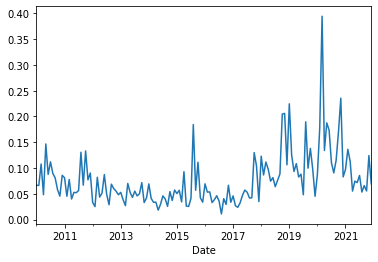

In [109]:
lnHL = np.log(precios["High"]/precios["Low"]).dropna()
sigmaPark_d = ((1/(4*np.log(2)))*lnHL["GE"]**2)**0.5
sigmaPark_d.plot();


#### **Medida de Garman-Klass**

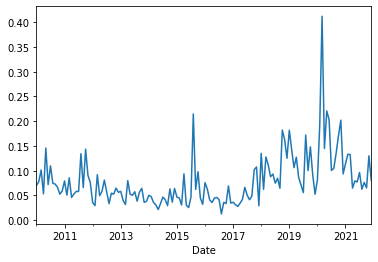

In [110]:
lnHL1 = np.log(precios["High"]/precios["Low"]).dropna()
lnCO = np.log(precios["Close"]/precios["Open"]).dropna()
sigmaGK_d = (0.5*lnHL1["GE"]**2-(2*np.log(2)-1)*lnCO["GE"]**2)**0.5
sigmaGK_d.plot();

#### **Volatilidad ponderada exponencial (EWMA)**

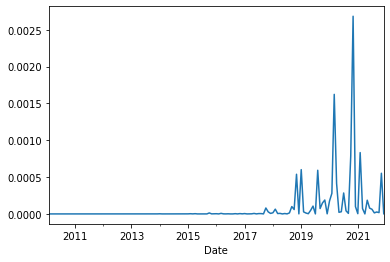

In [113]:
  m = len(retornos) 
  b = np.arange(m-1,-1,-1) 
  l = np.repeat(Lambda,m)
Lambda = 0.94
varewma = ((np.power(retornos["GE"],2)*(np.power(l,b))))*(1-0.94)
varewma.plot();

Como se menciono anteriormente el modelo Garman-Klass se ajusta al modelo de Parkinson. Por lo tanto, se observa que la serie se encuentra suavizada, es decir, se corrige en la baja. Por otro lado, se puede observar clusters de volatilidad mayormente notorios en el 2018, esto a causa de las pérdidas que tuvo la empresa en 2018. Estas pérdidas significaron el doble de las del 2017. Además la compañia se encontraba atravesando por un proceso de investigación judicial por la posible violación del acta de Reforma, Recuperación y Cumplimiento de las Instituciones Financieras de 1989 a raíz de la creación y venta de hipotecas de alto riesgo. Por consiguiente, alcanzo un acuerdo con la justicia de aproximadamente 1.500 millones de dólares. Por lo tanto, sus acciones empezaron a tener cambios fuertes en el tiempo debido a los diferentes problemas por lo cuales atravesaba la empresa. Cabe resaltar la crisis causada por el COVID-19 afecto todos los sectores del mundo, en especial, la economía de los países, es por esta razón que se encuentran altas volatilidades en este periodo atípico. 